In [1]:
from sklearn.datasets import *
from sklearn import model_selection
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
import scikitplot as skplt
from sklearn import metrics

import pickle

import glob as glob
import numpy as np

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

import re

In [2]:
with open("/home/ajindal/Documents/Projects/landscraper/pickles/model_1", "rb") as f:
    model = pickle.load(f)

In [3]:
test_set = "/home/ajindal/Documents/Projects/landscraper/test-set"
patents = load_files(test_set)
classifications = patents.target_names

In [4]:
predictions_vanilla = model.predict(patents.data)

In [5]:
np.mean(predictions_vanilla == patents.target)

0.5693943421302449

In [6]:
with open("/home/ajindal/Documents/Projects/landscraper/pickles/model_2", "rb") as f:
    model_sw = pickle.load(f)

In [7]:
predictions_sw = model_sw.predict(patents.data)
np.mean(predictions_sw == patents.target)

0.6282513764951585

In [8]:
with open("/home/ajindal/Documents/Projects/landscraper/pickles/model_3", "rb") as f:
    model_bestprm = pickle.load(f)

In [9]:
predictions_bestprm = model_bestprm.predict(patents.data)
np.mean(predictions_bestprm == patents.target)

0.6077463451680274

In [11]:
predictions = cross_val_predict(model, patents.data, patents.target)
predictions_sw = cross_val_predict(model_sw, patents.data, patents.target)
predictions_best = cross_val_predict(model_bestprm, patents.data, patents.target)

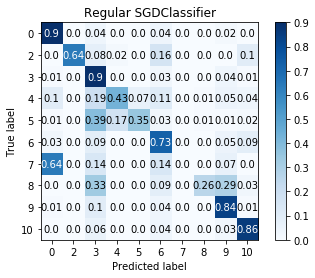

In [13]:
skplt.metrics.plot_confusion_matrix(patents.target, predictions, normalize=True)
plt.title("Regular SGDClassifier")
plt.show()

In [ ]:
print(metrics.classification_report(patents, predictions, target_names=classifications))

In [ ]:
metrics.confusion_matrix(y_test, prediction)

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, predictions_sw, normalize=True)
plt.title("Stop Words SGDClassifier")
plt.show()